# Question 2: Materials Project API Exploration

**2.1 Querying Materials Project Database**

You will use the Materials Project API (MPRester and pymatgen) to query materials based on various criteria. You may choose to use the legacy or the new API.

a) Initialize MPRester and query materials to find stable (within 50meV of convex hull) binary oxides with density greater than 4 g/cc. For these materials extract materials properties from materials project. 

In [1]:
#your code goes here
import pandas as pd
from pymatgen.ext.matproj import MPRester
import os

apiKeyPath = "/Users/stanleywessman/Downloads/oldApiKey.txt"

# Read API key from file
def readFile(filename):
    try:
        with open(filename, 'r') as f:
            return f.read().strip()
    except FileNotFoundError:
        print("File not found")
        return None

apiKey = readFile(apiKeyPath)

with MPRester(apiKey) as mpr:
    # search for materials that are stable binary oxides with density greater than 4 g/cc
    criteria = {"elements": {"$all": ["O"]}, "e_above_hull":{"$lte": 0.05}, "nelements": 2, "density": {"$gte": 4}}
    properties = ["material_id","pretty_formula", "e_above_hull", "density"]
    results = mpr.query(criteria, properties)


/Users/stanleywessman/miniconda3/envs/oldMP/lib/python3.12/site-packages/pymatgen/ext/matproj_legacy.py:164: UserWarning: You are using the legacy MPRester. This version of the MPRester will no longer be updated. To access the latest data with the new MPRester, obtain a new API key from https://materialsproject.org/api and consult the docs at https://docs.materialsproject.org/ for more information.
  warnings.warn(


b) Display basic information about the queried materials.



In [2]:
#your code goes here
df = pd.DataFrame(results)
df


,material_id,pretty_formula,e_above_hull,density
0,mp-617,PtO2,0.004836,9.198821
1,mp-754806,Ni5O6,0.040715,5.837722
2,mp-1190549,GeO2,0.045006,4.119933
3,mvc-6611,SnO2,0.000326,6.607882
4,mp-2591,Ti3O,0.000000,4.839897
...,...,...,...,...
424,mp-748,Ti5O9,0.010920,4.210076
425,mp-1281333,CrO2,0.040652,4.658367
426,mp-985608,Nd2O5,0.028070,6.067978
427,mp-30524,Ti6O11,0.012026,4.188844


**2.2 Matching Structures to CIF Cards**

a) Using the Crystallographic Open Database (http://crystallography.net/cod/search.html) or the American Mineralogist Crystal Structure Database (https://rruff.geo.arizona.edu/AMS/amcsd.php) look up the cif card for your birth month (https://en.wikipedia.org/wiki/Birthstone). 

Then, see if you can use that cif card to find any Materials Project matches. Save the mp-id's to a list

In [3]:
# load the emerald cif file into the variable ciffile 
ciffile = os.path.join("emerald.cif")
with MPRester(apiKey) as mpr:
    # find the material ID of the loaded cif file 
    matID = mpr.find_structure(ciffile)[0]
    # find the anonymous formula
    entry = mpr.get_entry_by_material_id(matID, property_data=['anonymous_formula'])
    anonymous_formula = entry.data['anonymous_formula']

    # find matching structures using the anonymous formula
    criteria = {"anonymous_formula": anonymous_formula, "e_above_hull":{"$lte": 0.05}}
    properties = ["material_id","pretty_formula", "e_above_hull", "density", "formation_energy_per_atom"]
    results = mpr.query(criteria, properties)
df = pd.DataFrame(results)
df




/Users/stanleywessman/miniconda3/envs/oldMP/lib/python3.12/site-packages/pymatgen/ext/matproj_legacy.py:164: UserWarning: You are using the legacy MPRester. This version of the MPRester will no longer be updated. To access the latest data with the new MPRester, obtain a new API key from https://materialsproject.org/api and consult the docs at https://docs.materialsproject.org/ for more information.
  warnings.warn(
/Users/stanleywessman/miniconda3/envs/oldMP/lib/python3.12/site-packages/pymatgen/io/cif.py:1221: UserWarning: Issues encountered while parsing CIF: 2 fractional coordinates rounded to ideal values to avoid issues with finite precision.
  warnings.warn("Issues encountered while parsing CIF: " + "\n".join(self.warnings))


,material_id,pretty_formula,e_above_hull,density,formation_energy_per_atom
0,mp-556960,Sr3Fe2(SeO3)6,0.000000,4.085274,-1.954225
1,mp-1228122,Ba6Bi2(TeO6)3,0.000000,6.642304,-2.389007
2,mp-6030,Be3Al2(SiO3)6,0.000000,2.566869,-3.277479
3,mp-558944,Tl2Cu3(SeO3)6,0.000000,5.110077,-1.160423
4,mp-1200516,In2Cu3(SeO3)6,0.003167,4.539139,-1.305290
5,mp-16928,Ba6Lu2(WO6)3,0.000000,7.615227,-3.116999
6,mp-558486,Fe2Cu3(SeO3)6,0.000000,4.335074,-1.282282
7,mp-1203611,Ga2Cu3(SeO3)6,0.000000,4.560798,-1.349187
8,mp-560955,Ba2Mn3(SeO3)6,0.000000,4.275204,-1.850484


**2.3 Plotting Materials Properties**

Plot relevant properties extracted from the Materials Project database.

a) Extract and plot materials properties (e.g., density, formation energy) for the queried materials.

Text(0.5, 1.0, 'Energy Above Hull vs Formula')

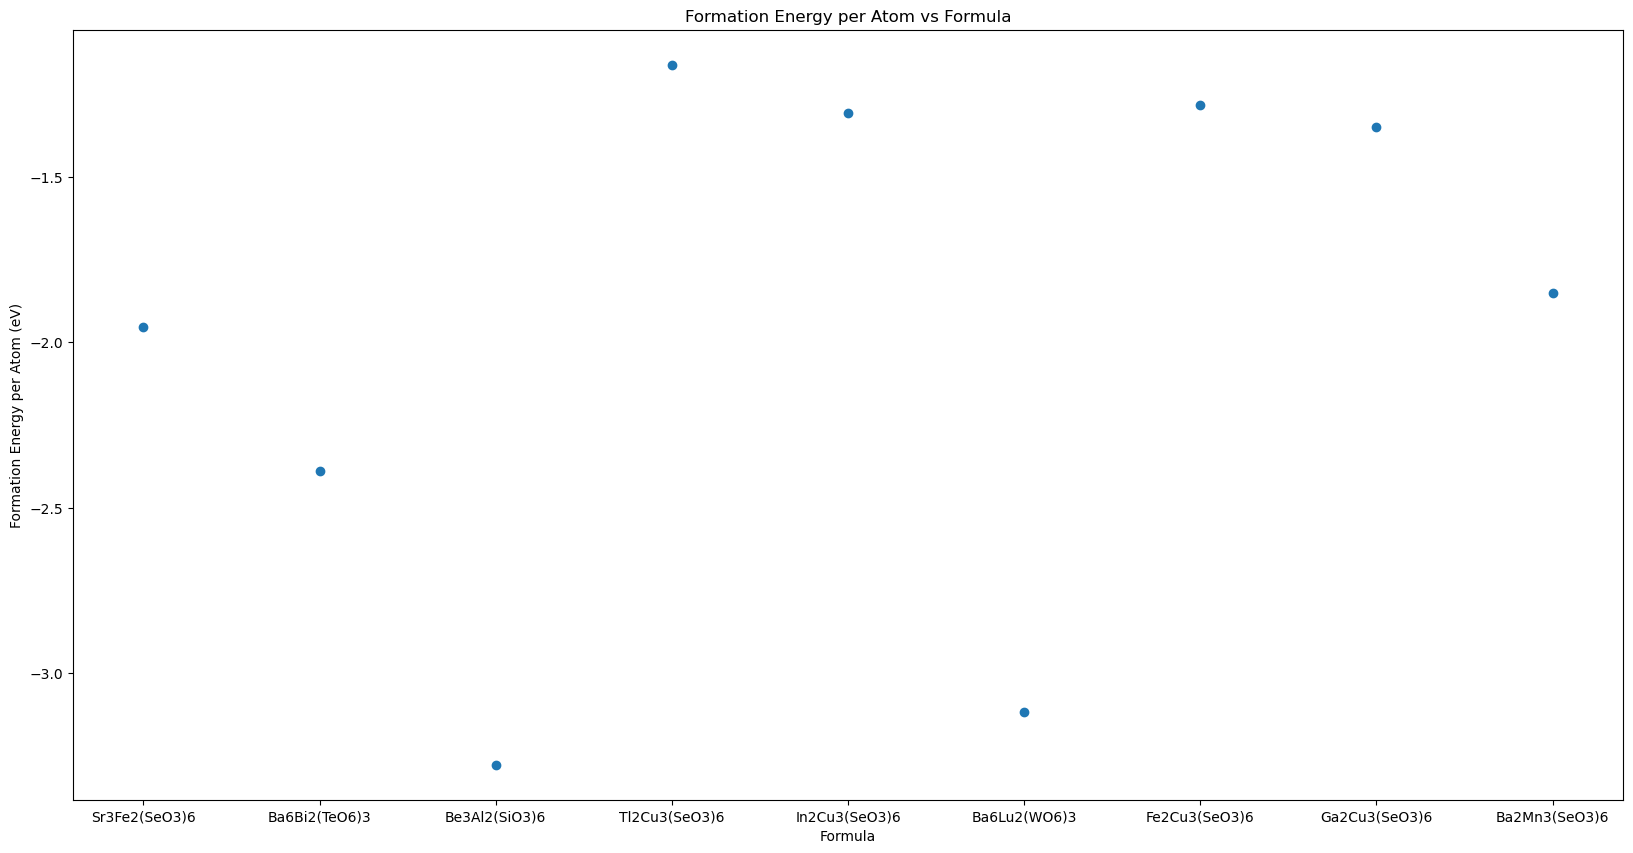

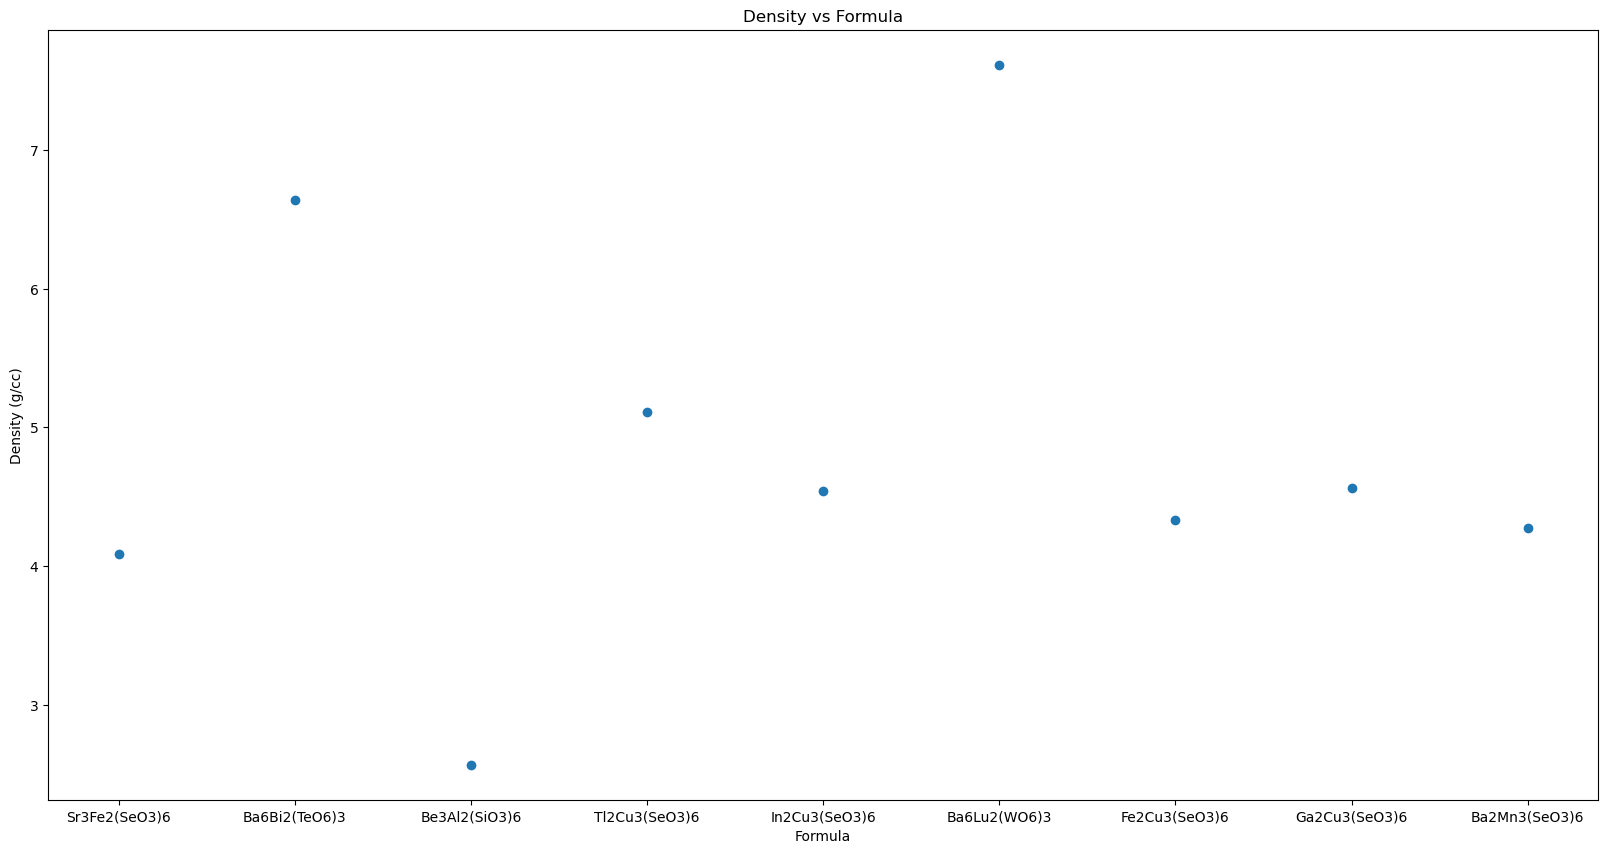

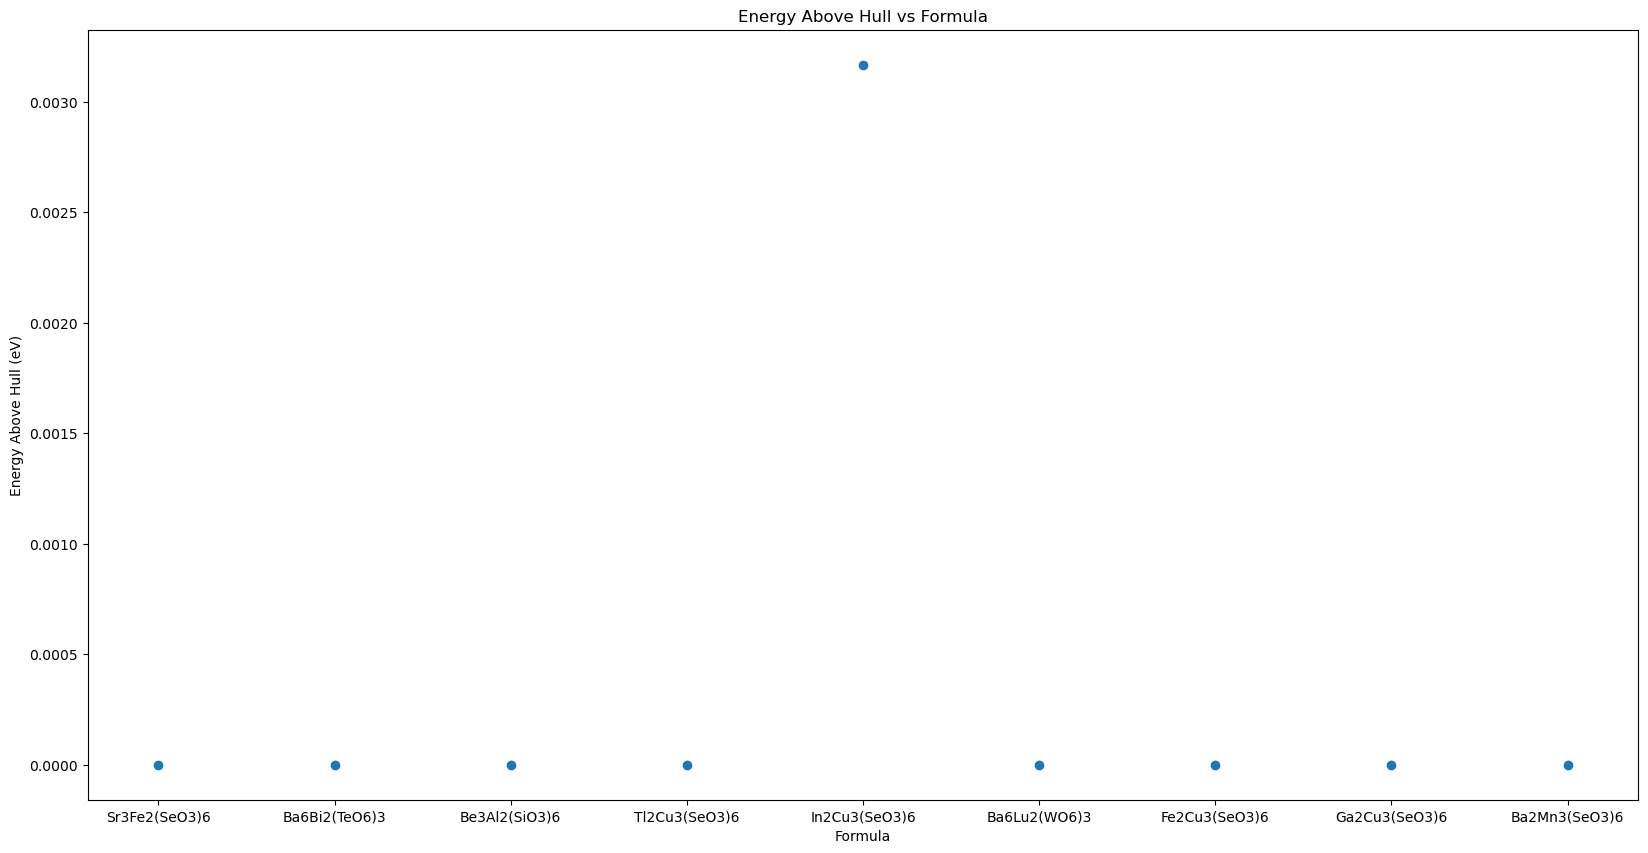

In [4]:
#your code goes here
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(20,10))
# plot the formation energy of each atom
plt.scatter(df['pretty_formula'],df['formation_energy_per_atom'])
plt.xlabel('Formula')
plt.ylabel('Formation Energy per Atom (eV)')
plt.title('Formation Energy per Atom vs Formula')

fig = plt.figure(figsize=(20,10))
#plot the density of each atom
plt.scatter(df['pretty_formula'],df['density'])
plt.xlabel('Formula')
plt.ylabel('Density (g/cc)')
plt.title('Density vs Formula')

fig = plt.figure(figsize=(20,10))
#plot the e_above_hull of each atom
plt.scatter(df['pretty_formula'],df['e_above_hull'])
plt.xlabel('Formula')
plt.ylabel('Energy Above Hull (eV)')
plt.title('Energy Above Hull vs Formula')



